In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# ÄNDRA DENNA VÄG TILL: "../data/ecommerce_sales (1).csv"
# när du kör i din projektstruktur. Jag använder bara filnamnet här för test.
filnamn = "../data/ecommerce_sales (1).csv" 

print("Kör Cell 1.")

Kör Cell 1.


In [7]:
# Ladda in CSV-filen
try:
    data = pd.read_csv(filnamn)
except Exception as e:
    print(f"FEL vid laddning eller felaktigt filnamn. Kontrollera Cell 1. Felet var: {e}")
    # Vi stoppar inte programmet, men fortsätter inte heller med analys.
    pass

# Välj ut de städer vi ska titta på
stad_lista = ['Stockholm', 'Göteborg', 'Malmö']

# Filtrera data - DENNA RAD ÄR KORREKT
data_filtrerad = data[data['city'].isin(stad_lista)].copy()

print("Data har filtrerats.")


Data har filtrerats.


In [9]:
# Aggregera data: Räkna sålda enheter per kategori i varje stad
forsaljning_per_stad_kategori = data_filtrerad.groupby(['city', 'category'])['units'].sum().reset_index()

# Pivota data för enkel diagramritning
diagram_data = forsaljning_per_stad_kategori.pivot(index='category', columns='city', values='units').fillna(0)

print("Data har aggregerats och är redo för diagram.")

Data har aggregerats och är redo för diagram.


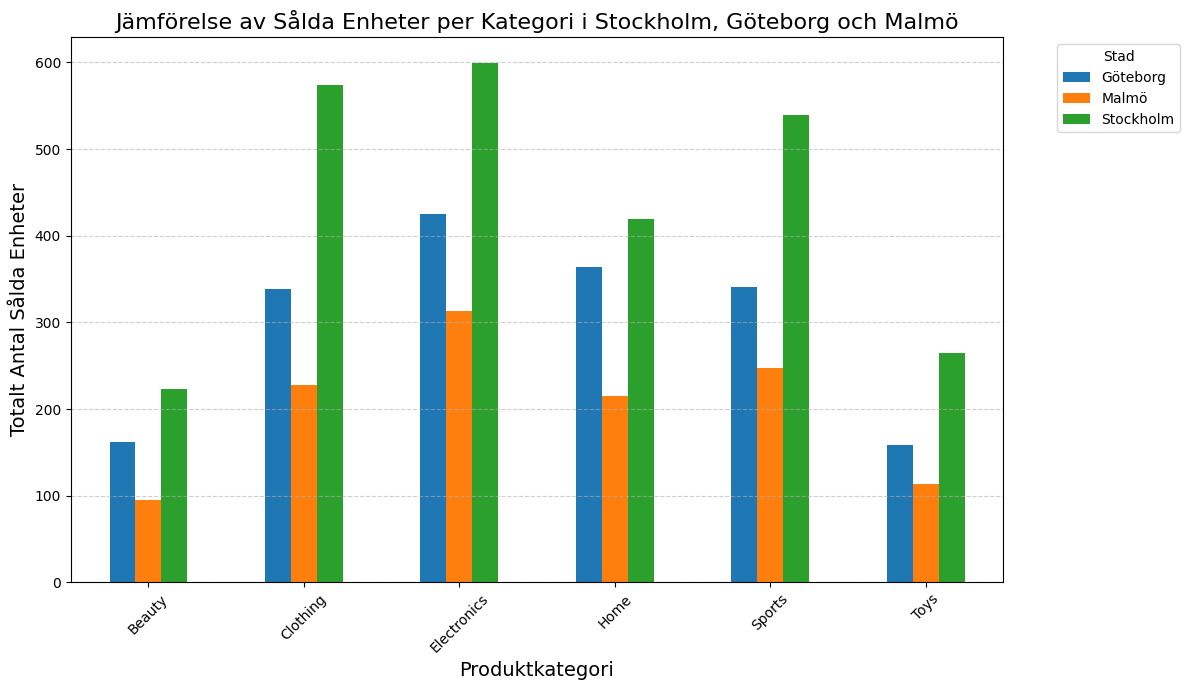

In [10]:
plt.figure(figsize=(12, 7))

# Rita stapeldiagrammet (Icke-stackat)
diagram_data.plot(kind='bar', stacked=False, figsize=(12, 7), rot=45, ax=plt.gca())

# Ställ in titel och etiketter
plt.title('Jämförelse av Sålda Enheter per Kategori i Stockholm, Göteborg och Malmö', fontsize=16)
plt.xlabel('Produktkategori', fontsize=14)
plt.ylabel('Totalt Antal Sålda Enheter', fontsize=14)
plt.legend(title='Stad', bbox_to_anchor=(1.05, 1), loc='upper left')

# Förbättra läsbarheten
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Använd plt.show() i notebooken

Figuren visar det totala antalet sålda enheter per produktkategori i Stockholm, Göteborg och Malmö. Katergorin 'Electronicks' är det klart mest sålda produkten i alla tre städer, vilket bekräftar att trenden för denna kategori är konsekvent stark oavsett stad.